In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print(df)
print("\n➡️HEAD OF DATASET\n\n",df.head(),"\n\n\n")

print("\n➡️TAIL OF DATASET\n\n",df.tail(),"\n\n\n")

print("\n➡️SUMMARY STATISTICS OF DATASET\n\n",df.describe(),"\n\n\n")

print("\n➡️INFORMATION OF DATASET\n\n",df.info(),"\n\n\n")

print("\n➡️COLUMN NAMES\n\n",df.columns,"\n\n\n")

print("\n➡️SHAPE OF DATASET\n\n",df.shape,"\n\n\n")

print("\n ➡ COUNT  OF MISSING VALUES OF EACH COLUMN\n\n",df.isnull().sum(),"\n\n\n")

print("\n ➡ DROP ALL ROWS CONTAINING MISSING VALUES\n\n",df.dropna(),"\n\n\n")

                               Firm.Name            City State  Firm.Number  \
0                         Bravo CPA, LLC         Spokane    WA        55377   
1     Myers Forensic Accounting Services         SHELTON    WA        57484   
2           CINDY L. ISAACSON, CPA, P.S.         EDMONDS    WA         4583   
3                  DONALD D. ROBINS, CPA  SPOKANE VALLEY    WA         1440   
4                      MARTIN BOYLE PLLC        Kirkland    WA         4779   
...                                  ...             ...   ...          ...   
2278                            REDW LLC     Albuquerque    NM         6345   
2279         NORTHWEST CPA SOLUTIONS LLC      Ridgefield    WA        48231   
2280        S D MAYER AND ASSOCIATES LLP   SAN FRANCISCO    CA         6346   
2281               JANE BECKER, CPA, LLC       Anacortes    WA         6371   
2282                    MICHAEL RICE CPA           Salem    OR         5982   

     Registration.Date     Expires               Ty

In [7]:
duplicate_rows = df[df.duplicated()]
print("🔁 Duplicate Rows:")
print(duplicate_rows)

print(f"\nTotal number of duplicate rows: {duplicate_rows.shape[0]}")

unique_columns = [col for col in df.columns if df[col].is_unique]
print("\n✅ Columns with all unique values:")
print(unique_columns)

🔁 Duplicate Rows:
Empty DataFrame
Columns: [Firm.Name, City, State, Firm.Number, Registration.Date, Expires, Type of Business, Last.Updated, Board Order]
Index: []

Total number of duplicate rows: 0

✅ Columns with all unique values:
['Firm.Number']


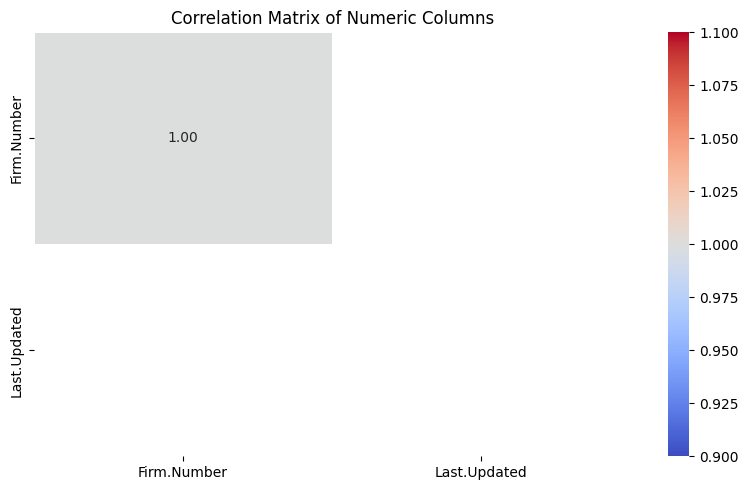

In [15]:

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

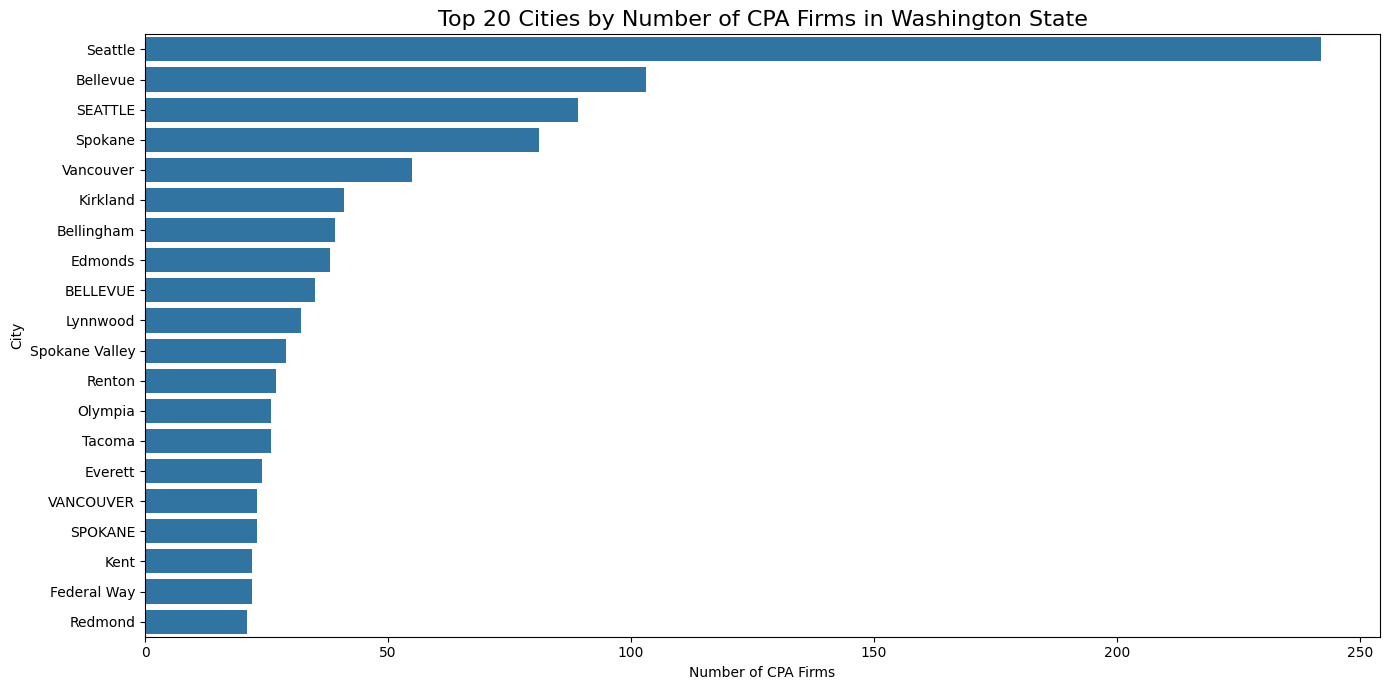

In [20]:
#objective 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = ("C:\\Users\\rajpu\\Downloads\\Washington_State_CPA__Certified_Public_Accountant__Firms_20250412.csv")
df = pd.read_csv(file_path)

df_cleaned = df.dropna(subset=["City"])

city_counts = df_cleaned["City"].value_counts().head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=city_counts.values, y=city_counts.index)  # ⬅️ removed palette
plt.title("Top 20 Cities by Number of CPA Firms in Washington State", fontsize=16)
plt.xlabel("Number of CPA Firms")
plt.ylabel("City")
plt.tight_layout()
plt.show()


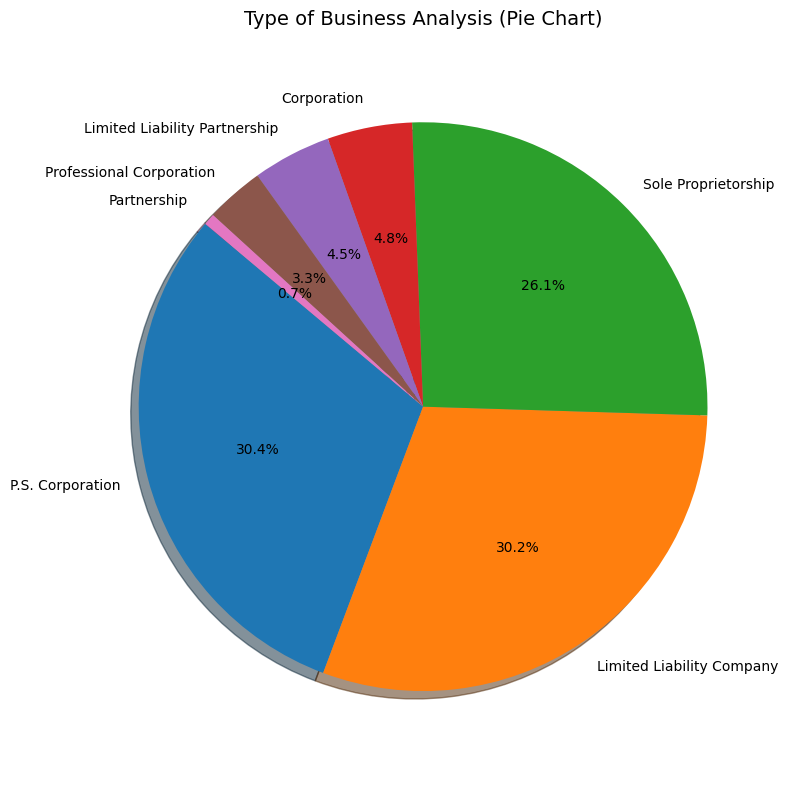

In [24]:
#onjective 2

import pandas as pd
import matplotlib.pyplot as plt

file_path = ("C:\\Users\\rajpu\\Downloads\\Washington_State_CPA__Certified_Public_Accountant__Firms_20250412.csv")
df = pd.read_csv(file_path)

df_cleaned = df.dropna(subset=["Type of Business"])

business_type_counts = df_cleaned["Type of Business"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    business_type_counts.values,
    labels=business_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title("Type of Business Analysis (Pie Chart)", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.tight_layout()
plt.show()


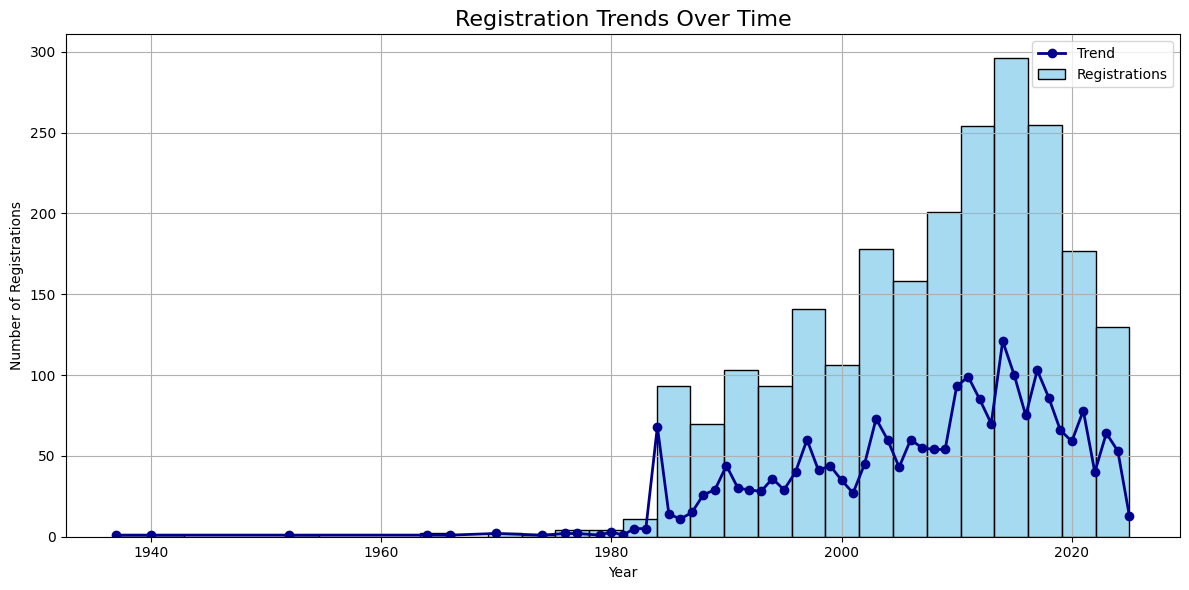

In [40]:
#objective 3

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = ("C:\\Users\\rajpu\\Downloads\\Washington_State_CPA__Certified_Public_Accountant__Firms_20250412.csv")
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

df["Original Issue Date"] = pd.to_datetime(df["Registration.Date"], errors="coerce")

df_cleaned = df.dropna(subset=["Original Issue Date"]).copy()

df_cleaned["Registration Year"] = df_cleaned["Original Issue Date"].dt.year

yearly_counts = df_cleaned["Registration Year"].value_counts().sort_index()

plt.figure(figsize=(12, 6))

sns.histplot(df_cleaned["Registration Year"], bins=30, color="skyblue", kde=False, label="Registrations")

plt.plot(yearly_counts.index, yearly_counts.values, color='darkblue', linewidth=2, marker='o', label="Trend")

plt.title("Registration Trends Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Registrations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


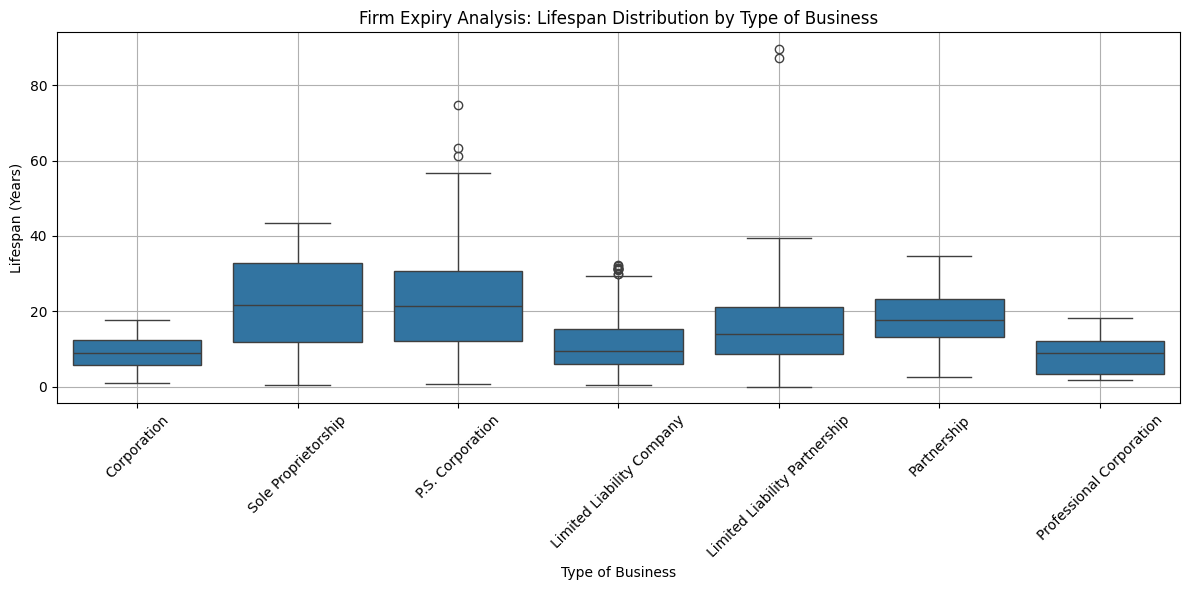

In [43]:
#objective 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\rajpu\\Downloads\\Washington_State_CPA__Certified_Public_Accountant__Firms_20250412.csv")

df['Registration.Date'] = pd.to_datetime(df['Registration.Date'], errors='coerce')
df['Expires'] = pd.to_datetime(df['Expires'], errors='coerce')

df_clean = df.dropna(subset=['Registration.Date', 'Expires']).copy()

df_clean['Lifespan'] = (df_clean['Expires'] - df_clean['Registration.Date']).dt.days / 365.25

df_clean = df_clean[df_clean['Lifespan'] > 0]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_clean,
    x='Type of Business',
    y='Lifespan'
)

plt.title('Firm Expiry Analysis: Lifespan Distribution by Type of Business')
plt.xlabel('Type of Business')
plt.ylabel('Lifespan (Years)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


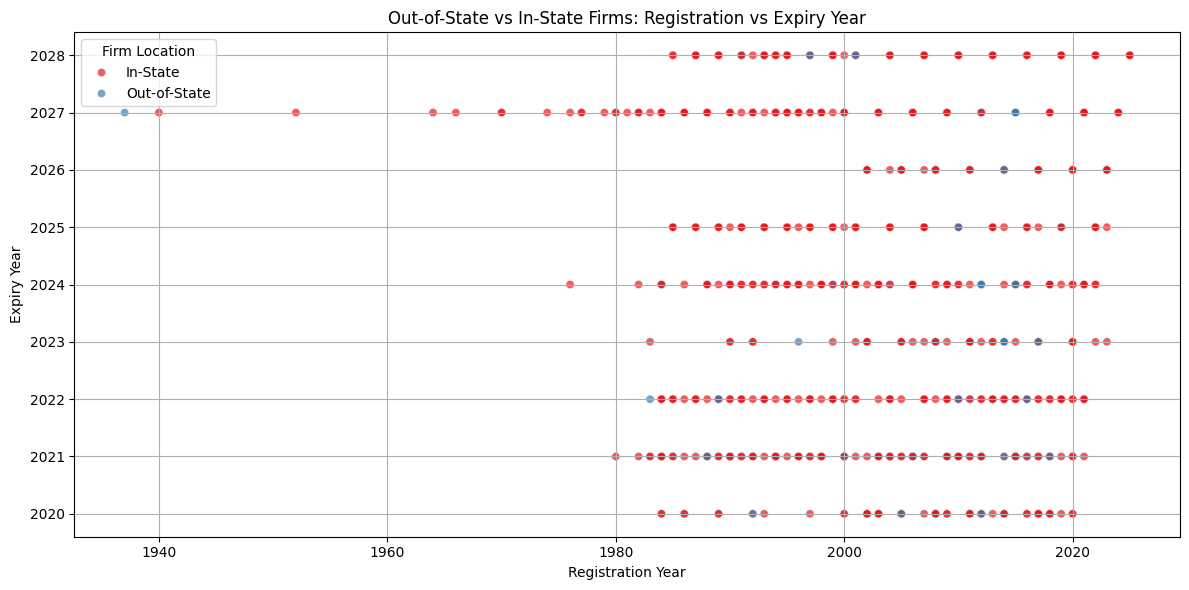

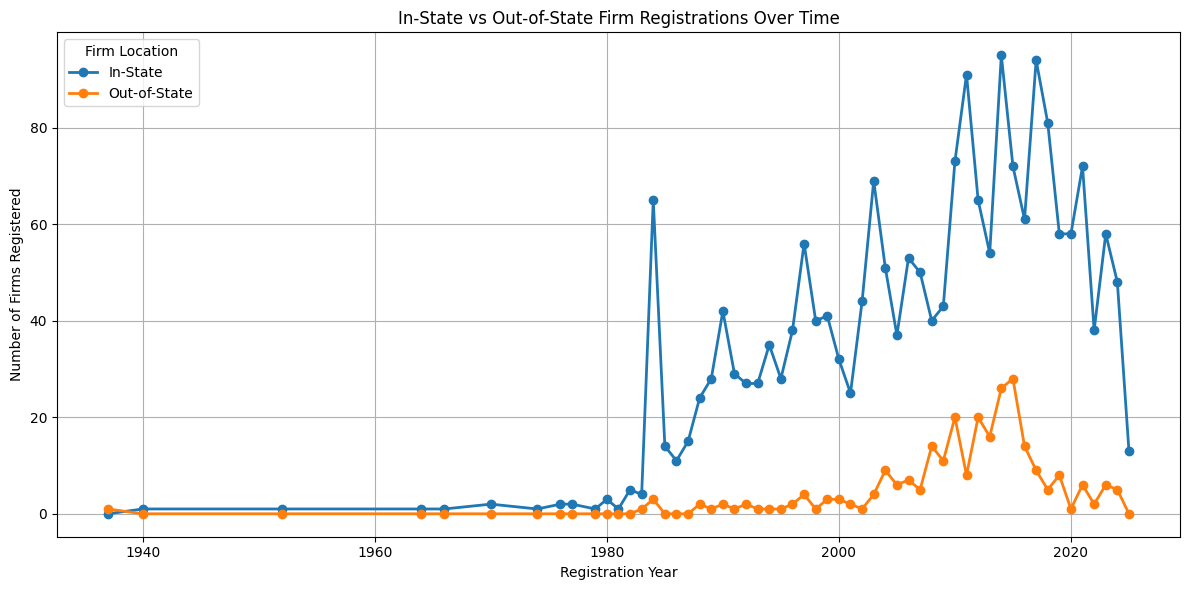

In [49]:
#objective 5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:\\Users\\rajpu\\Downloads\\Washington_State_CPA__Certified_Public_Accountant__Firms_20250412.csv")

df['Registration.Date'] = pd.to_datetime(df['Registration.Date'], errors='coerce')
df['Expires'] = pd.to_datetime(df['Expires'], errors='coerce')

df_clean = df.dropna(subset=['Registration.Date', 'Expires']).copy()

df_clean['Registration_Year'] = df_clean['Registration.Date'].dt.year
df_clean['Expiry_Year'] = df_clean['Expires'].dt.year

df_clean['Location'] = np.where(df_clean['State'] == 'WA', 'In-State', 'Out-of-State')

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_clean,
    x='Registration_Year',
    y='Expiry_Year',
    hue='Location',
    alpha=0.7,
    palette='Set1'
)

# Plot formatting
plt.title('Out-of-State vs In-State Firms: Registration vs Expiry Year')
plt.xlabel('Registration Year')
plt.ylabel('Expiry Year')
plt.grid(True)
plt.legend(title='Firm Location')
plt.tight_layout()
plt.show()


df = pd.read_csv("C:\\Users\\rajpu\\Downloads\\Washington_State_CPA__Certified_Public_Accountant__Firms_20250412.csv")

df['Registration.Date'] = pd.to_datetime(df['Registration.Date'], errors='coerce')

df_clean = df.dropna(subset=['Registration.Date']).copy()

df_clean['Registration_Year'] = df_clean['Registration.Date'].dt.year

df_clean['Location'] = np.where(df_clean['State'] == 'WA', 'In-State', 'Out-of-State')

yearly_counts = df_clean.groupby(['Registration_Year', 'Location']).size().reset_index(name='Firm_Count')

pivot_table = yearly_counts.pivot(index='Registration_Year', columns='Location', values='Firm_Count').fillna(0)

plt.figure(figsize=(12, 6))
pivot_table.plot(kind='line', marker='o', ax=plt.gca(), linewidth=2)

plt.title('In-State vs Out-of-State Firm Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Number of Firms Registered')
plt.grid(True)
plt.legend(title='Firm Location')
plt.tight_layout()
plt.show()
